<h1 style="text-align: center; color: red">Projet : Exploration de donnée et prédiction</h1>

<h2 style="color: green">GROUPE 1 :</h2>
<ul>
    <li>DERRUDER Thomas</li>
    <li>BARREZ Lucas</li>
    <li>MOREL Alexandre</li>
</ul>

<p>Dans le cadre de ce projet d'exploration et de prédiction, nous avons décidé de travailler sur le projet d'analyse des prix de logement Airbnb. L'objectif est de comprendre l'influence de l'ensemble des caractéristiques d'un logement sur son prix, et finalement d'être capable de prédire le prix d'une location d'un logement donné.</p>

<h2 style="color: green">Initialisation du projet :</h2>

<h3>Installation et importation des librairies :</h3>


In [ ]:
%pip install pandas
%pip install numpy
%pip install torch
%pip install seaborn

In [1]:
# import csv in pandas airbnb test and train data
import logging
import os
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch

<h3>Exécution en ligne du projet</h3>
<p>L'ensemble de se notebook est exécutable sur le cloud en cas de manque de ressource sur votre appareil local.</p>


In [134]:
import s3fs

os.environ["AWS_ACCESS_KEY_ID"] = "L5CIXI5468LYT84GLZ8G"
os.environ["AWS_SECRET_ACCESS_KEY"] = "JOsC+strL32fLyrROnqFt9+yEDd4mMq5zfoVGjil"
os.environ["AWS_SESSION_TOKEN"] = (
    "eyJhbGciOiJIUzUxMiIsInR5cCI6IkpXVCJ9.eyJhY2Nlc3NLZXkiOiJMNUNJWEk1NDY4TFlUODRHTFo4RyIsImFsbG93ZWQtb3JpZ2lucyI6WyIqIl0sImF1ZCI6WyJtaW5pby1kYXRhbm9kZSIsIm9ueXhpYSIsImFjY291bnQiXSwiYXV0aF90aW1lIjoxNzE1Nzc2MzA2LCJhenAiOiJvbnl4aWEiLCJlbWFpbCI6InRob21hcy5kZXJ1ZGRlckBlZHUuZGV2aW5jaS5mciIsImVtYWlsX3ZlcmlmaWVkIjp0cnVlLCJleHAiOjE3MTYzODExMTQsImZhbWlseV9uYW1lIjoiRGVydWRkZXIiLCJnaXZlbl9uYW1lIjoiVGhvbWFzIiwiZ3JvdXBzIjpbIlVTRVJfT05ZWElBIl0sImlhdCI6MTcxNTc3NjMxMywiaXNzIjoiaHR0cHM6Ly9hdXRoLmxhYi5zc3BjbG91ZC5mci9hdXRoL3JlYWxtcy9zc3BjbG91ZCIsImp0aSI6ImY1YmMwZmViLTU1MjgtNDBlZC1iNDFkLWRmY2NjMGE3MzZjOSIsIm5hbWUiOiJUaG9tYXMgRGVydWRkZXIiLCJwb2xpY3kiOiJzdHNvbmx5IiwicHJlZmVycmVkX3VzZXJuYW1lIjoiYnJpb2NoZSIsInJlYWxtX2FjY2VzcyI6eyJyb2xlcyI6WyJvZmZsaW5lX2FjY2VzcyIsInVtYV9hdXRob3JpemF0aW9uIiwiZGVmYXVsdC1yb2xlcy1zc3BjbG91ZCJdfSwicmVzb3VyY2VfYWNjZXNzIjp7ImFjY291bnQiOnsicm9sZXMiOlsibWFuYWdlLWFjY291bnQiLCJtYW5hZ2UtYWNjb3VudC1saW5rcyIsInZpZXctcHJvZmlsZSJdfX0sInNjb3BlIjoib3BlbmlkIHByb2ZpbGUgZ3JvdXBzIGVtYWlsIiwic2Vzc2lvbl9zdGF0ZSI6IjgxNTNjOGIzLTU4YmEtNGJiMS05NWYxLWMyZTFjNmQyYmQwZiIsInNpZCI6IjgxNTNjOGIzLTU4YmEtNGJiMS05NWYxLWMyZTFjNmQyYmQwZiIsInN1YiI6IjVkNWM0OWM2LTAzNmUtNGRkOC1hNTg1LWFlODhlMDkzMTJjNiIsInR5cCI6IkJlYXJlciJ9.qdMgF5Cb2Wht9_ffJ7CKMcmpLhmtKId-DwPL5C-8ptVy93lluehe-6XcCN_1XZsD1YiSyD1Pupum5U6fIsBCYA"
)
os.environ["AWS_DEFAULT_REGION"] = "us-east-1"
fs = s3fs.S3FileSystem(
    client_kwargs={"endpoint_url": "https://" + "minio.lab.sspcloud.fr"},
    key=os.environ["AWS_ACCESS_KEY_ID"],
    secret=os.environ["AWS_SECRET_ACCESS_KEY"],
    token=os.environ["AWS_SESSION_TOKEN"],
)

# Create filesystem object
S3_ENDPOINT_URL = "https://" + os.environ["AWS_S3_ENDPOINT"]
fs = s3fs.S3FileSystem(client_kwargs={"endpoint_url": S3_ENDPOINT_URL})

BUCKET = "brioche"
FILE_KEY_S3 = "saves/csv/airbnb_test.csv"
FILE_PATH_S3 = BUCKET + "/" + FILE_KEY_S3

with fs.open(FILE_PATH_S3, mode="rb") as file_in:
    df_bpe = pd.read_csv(file_in, sep=",")

df_bpe

ModuleNotFoundError: No module named 's3fs'

In [135]:
# Check if CUDA is available
if torch.cuda.is_available():
    # Set the device to CUDA
    device: str = torch.device("cuda")

    # Get the number of CUDA-capable devices
    num_devices = torch.cuda.device_count()
    print("Number of CUDA-capable devices:", num_devices)

    # Iterate through each device and print its information
    for i in range(num_devices):
        current_device = torch.cuda.device(i)
        device_name = torch.cuda.get_device_name(current_device)
        total_memory = torch.cuda.get_device_properties(current_device).total_memory
        memory_used = torch.cuda.memory_allocated(current_device)
        memory_free = torch.cuda.memory_reserved(current_device)

        print(f"Device {i}:")
        print(f"  Name: {device_name}")
        print(f"  Total Memory: {total_memory / (1024 * 1024)} MB")
        print(f"  Memory Used: {memory_used / (1024 * 1024)} MB")
        print(f"  Memory Free: {memory_free / (1024 * 1024)} MB")
else:
    print("CUDA is not available.")

CUDA is not available.


<h2 style="color: green">Exploration des données :</h2>

<p>Explorons les données afin d'en apprendre davantage sur la structure du dataset. Dans cette partie nous traiterons également du nettoyage du dataset.</p>


In [120]:
# Chargement des données dans un DataFrame
data = pd.read_csv("./csv/airbnb_train.csv")

Caractéristiques du dataset :


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22234 entries, 0 to 22233
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      22234 non-null  int64  
 1   log_price               22234 non-null  float64
 2   property_type           22234 non-null  object 
 3   room_type               22234 non-null  object 
 4   amenities               22234 non-null  object 
 5   accommodates            22234 non-null  int64  
 6   bathrooms               22183 non-null  float64
 7   bed_type                22234 non-null  object 
 8   cancellation_policy     22234 non-null  object 
 9   cleaning_fee            22234 non-null  bool   
 10  city                    22234 non-null  object 
 11  description             22234 non-null  object 
 12  first_review            17509 non-null  object 
 13  host_has_profile_pic    22178 non-null  object 
 14  host_identity_verified  22178 non-null

In [5]:
data.shape
print(f"Nombre de lignes : {data.shape[0]} \nNombre de colonnes : {data.shape[1]}")

Nombre de lignes : 22234 
Nombre de colonnes : 28


In [6]:
# Valeurs manquantes dans le jeu de données
data.isnull().sum()

id                           0
log_price                    0
property_type                0
room_type                    0
amenities                    0
accommodates                 0
bathrooms                   51
bed_type                     0
cancellation_policy          0
cleaning_fee                 0
city                         0
description                  0
first_review              4725
host_has_profile_pic        56
host_identity_verified      56
host_response_rate        5475
host_since                  56
instant_bookable             0
last_review               4716
latitude                     0
longitude                    0
name                         0
neighbourhood             2086
number_of_reviews            0
review_scores_rating      4978
zipcode                    303
bedrooms                    26
beds                        35
dtype: int64

Afin de prendre une décision sur la suppression de certaines lignes, regardons la quantité de valeurs nulles relativement au dataset :


In [7]:
# Calcul du pourcentage de valeurs manquantes pour chaque colonne
missing_percent = (data.isnull().sum() / len(data)) * 100

# Affichage des colonnes avec des valeurs manquantes
missing_percent[missing_percent > 0]

bathrooms                  0.229378
first_review              21.251237
host_has_profile_pic       0.251867
host_identity_verified     0.251867
host_response_rate        24.624449
host_since                 0.251867
last_review               21.210758
neighbourhood              9.382028
review_scores_rating      22.389134
zipcode                    1.362778
bedrooms                   0.116938
beds                       0.157417
dtype: float64

Nous nous autorisons à supprimer les lignes où il y a des valeurs non définies sur les colonnes dont le pourcentage de NaN est très faible : <2%


In [121]:
# Suppression des lignes avec des valeurs manquantes (<2%)
# data = data.dropna(
#     subset=[
#         "id",
#         "beds",
#         "bedrooms",
#         "bathrooms",
#         "host_since",
#         "host_identity_verified",
#         "host_has_profile_pic",
#         "zipcode",
#     ]
# )

# changements des valeurs manquantes dans la colonne review_scores_rating par le dernier quartile
data["review_scores_rating"] = data["review_scores_rating"].fillna(
    data["review_scores_rating"].quantile(0.25)
)
# if host_identity_verified if none then false
data["host_identity_verified"] = data["host_identity_verified"].fillna("f")


# fill host_response_rate with quantile 0.75
def getSTRQuantile75(column) -> float:
    # parse "%" to float and divide by 100 ignoring nan
    column = column.str.replace("%", "").astype(float)
    return column.quantile(0.25)


def getFloatQuantile75(column) -> float:
    return column.quantile(0.25)


my_quantil = getSTRQuantile75(data["host_response_rate"])
# remove % from column
data["host_response_rate"] = data["host_response_rate"].str.replace("%", "")
data["host_response_rate"] = data["host_response_rate"].fillna(my_quantil)

bedQuantil = getFloatQuantile75(data["beds"])
data["beds"] = data["beds"].fillna(bedQuantil)

bathQuantil = getFloatQuantile75(data["bathrooms"])
data["bathrooms"] = data["bathrooms"].fillna(bathQuantil)

# in column instant_bookable replace t by True and f by False
data["instant_bookable"] = data["instant_bookable"].replace({"t": True, "f": False})

# Suppression des colonnes inutiles
data = data.drop(
    columns=[
        "id",
        "name",
        "last_review",
        "first_review",
        "zipcode",
        "host_has_profile_pic",
        "host_since",
        "bedrooms",
    ]
)

data

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,host_identity_verified,host_response_rate,instant_bookable,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,beds
0,4.317488,House,Private room,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",3,1.0,Real Bed,flexible,False,LA,Large bright airy room with 2 balconies and Ja...,f,100.0,t,33.782712,-118.134410,Long Beach,0,92.0,2.0
1,4.007333,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",4,2.0,Real Bed,strict,False,NYC,Private room for rent in a six bedroom apt wit...,t,100,t,40.705468,-73.909439,Ridgewood,38,86.0,2.0
2,7.090077,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",6,2.0,Real Bed,flexible,False,DC,"14th st corridor 2br/2ba condo, secure boutiqu...",f,100.0,t,38.917537,-77.031651,U Street Corridor,0,92.0,2.0
3,3.555348,House,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1,1.0,Real Bed,flexible,True,NYC,My place is close to Manhattan. You can see th...,t,100,f,40.736001,-73.924248,Sunnyside,19,96.0,1.0
4,5.480639,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,moderate,True,SF,This beautiful home can be your dream destinat...,t,100,f,37.744896,-122.430665,Noe Valley,15,96.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22229,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,NYC,one room in bushwick apt,t,100.0,f,40.709025,-73.939405,Williamsburg,0,92.0,1.0
22230,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,LA,"Located on the Pacific Coast Highway, this apa...",f,100,f,33.871549,-118.396053,Hermosa Beach,16,93.0,4.0
22231,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,NYC,A modern apartment located in East Williamsbur...,t,100,t,40.706749,-73.942377,Williamsburg,43,94.0,2.0
22232,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,NYC,"Fully renovated, designer's studio located in ...",f,100,t,40.738535,-74.000157,West Village,0,92.0,2.0


In [8]:
pd.set_option("display.max_colwidth", 0)
data[
    [
        "property_type",
        "room_type",
        "bed_type",
        "cancellation_policy",
        "cleaning_fee",
        "city",
        "host_has_profile_pic",
        "host_identity_verified",
        "host_response_rate",
        "instant_bookable",
        "neighbourhood",
        "host_identity_verified",
    ]
].agg(["unique"]).transpose()

,unique
property_type,"[House, Apartment, Townhouse, Guest suite, Condominium, Timeshare, Chalet, Guesthouse, Bungalow, Loft, In-law, Boat, Dorm, Other, Bed & Breakfast, Camper/RV, Villa, Boutique hotel, Cabin, Hostel, Hut, Yurt, Serviced apartment, Castle, Vacation home, Tent, Cave, Tipi, Earth House, Island, Treehouse]"
room_type,"[Private room, Entire home/apt, Shared room]"
bed_type,"[Real Bed, Pull-out Sofa, Futon, Airbed, Couch]"
cancellation_policy,"[flexible, strict, moderate, super_strict_30, super_strict_60]"
cleaning_fee,"[False, True]"
city,"[LA, NYC, DC, SF, Chicago, Boston]"
host_has_profile_pic,"[t, nan, f]"
host_identity_verified,"[f, t, nan]"
host_response_rate,"[nan, 100%, 80%, 86%, 90%, 89%, 40%, 81%, 70%, 99%, 0%, 20%, 67%, 56%, 43%, 75%, 94%, 88%, 95%, 60%, 83%, 78%, 96%, 50%, 87%, 97%, 91%, 79%, 98%, 63%, 71%, 93%, 92%, 64%, 42%, 82%, 25%, 33%, 54%, 73%, 57%, 58%, 17%, 30%, 85%, 53%, 44%, 31%, 77%, 29%, 84%, 69%, 68%, 38%, 35%, 52%, 76%, 72%, 14%, 65%, 55%, 74%, 62%, 21%, 47%, 61%, 13%, 46%, 66%, 10%, 26%]"
instant_bookable,"[t, f]"


## Comptons quel est la representation de chaque type de logement:


/tmp/ipykernel_365934/1373699968.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


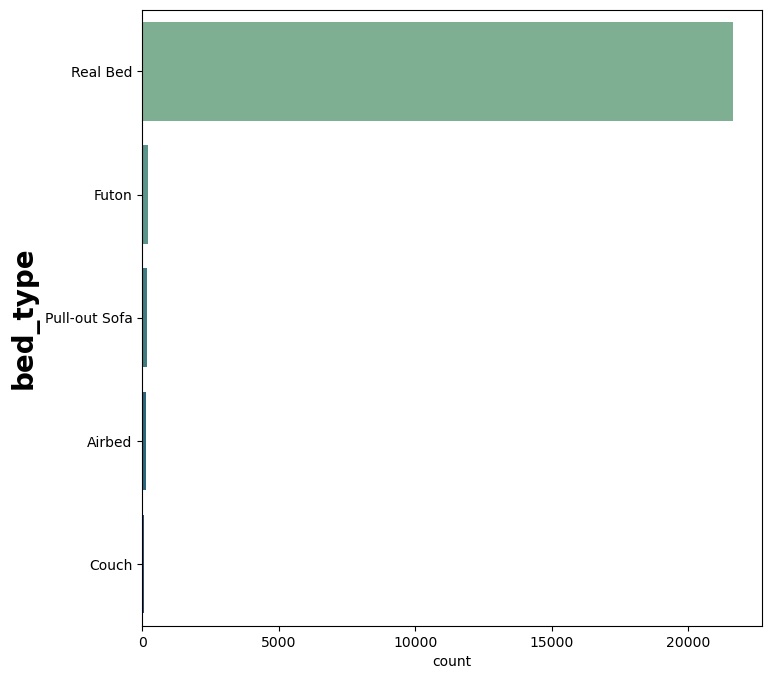

In [83]:
# data["property_type"].value_counts()

# plt.figure(figsize=(8, 8))
# sns.countplot(
#     y="property_type",
#     data=data,
#     order=data["property_type"].value_counts().index,
#     palette="crest",
# )
# plt.ylabel("Property type", fontsize=20, weight="bold", color="black")
# # plt.axes().set(facecolor = "White")
# plt.show()


def plot_data_column(data, column):
    plt.figure(figsize=(8, 8))
    sns.countplot(
        y=column,
        data=data,
        order=data[column].value_counts().index,
        palette="crest",
    )
    plt.ylabel(column, fontsize=20, weight="bold", color="black")
    plt.show()


plot_data_column(data, "bed_type")

Notre analyse ne nécessitera pas les colonnes suivantes :

- id : notre dataframe associe déjà des id à chaque ligne.
- city / latitude et longitude : Nous utiliserons les zipcode analyser par zone géographique.
- first review / last rewiew : Difficile à exploiter.
- name : Semble inutile ici.


In [122]:
def extract_dict_amneties(amenities_str: str) -> list:
    # Remove curly braces and split by comma
    amenities: re = re.findall(r'"(.*?)"|(\b\w+\b)', amenities_str)
    # Flatten the list and remove empty strings
    return [item for sublist in amenities for item in sublist if item]


def getUsefullAmneties(data: pd.Series) -> pd.Series:
    # Extract and treat all amenities
    all_amenities: pd.Series = data["amenities"].apply(extract_dict_amneties)
    # create a dataframe and count everytime an amenity is present
    amenities_df: pd.Series = (
        pd.DataFrame(all_amenities.tolist()).stack().value_counts()
    )
    # remove when it is lower than 0.5% of the biggest value
    return amenities_df[amenities_df >= amenities_df.max() * 0.01]


to_keep = getUsefullAmneties(data)

In [123]:
def extract_amenities(data: pd.Series, amnetiesToKeep: pd.Series) -> pd.Series:
    all_amenities: pd.Series = data["amenities"].apply(extract_dict_amneties)
    amenities_list: pd.Series = amnetiesToKeep.index.tolist()

    # Logs the number of amenities removed
    logging.info(
        "We have removed a total of",
        len(amnetiesToKeep) - len(all_amenities),
        "amenities",
    )
    logging.info(amnetiesToKeep)

    # Create empty DataFrame with columns for each amenity
    new_columns = {col: np.zeros(len(data), dtype=bool) for col in amenities_list}
    # join and if columns already exists threw an error
    if set(new_columns.keys()).intersection(data.columns):
        raise ValueError("Some columns already exists in the dataframe")
    data = data.join(pd.DataFrame(new_columns))

    # Set values in new columns based on presence of amenities in 'amenities' column
    for amenity in amenities_list:
        mask = data["amenities"].str.contains(amenity)
        # check if it exists a column with the same name
        data[amenity][mask] = True
    # remove the amenities column
    data = data.drop(columns=["amenities"])
    return data


data = extract_amenities(data, to_keep)

/tmp/ipykernel_365934/123537019.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[amenity][mask] = True


In [124]:
data.property_type.value_counts()

Apartment             14635
House                  4965
Condominium             836
Townhouse               507
Loft                    381
Other                   200
Guesthouse              156
Bed & Breakfast         130
Bungalow                 90
Villa                    54
Dorm                     43
Guest suite              39
Timeshare                29
Boat                     26
Boutique hotel           25
Camper/RV                23
Cabin                    22
In-law                   21
Hostel                   19
Tent                      6
Serviced apartment        5
Castle                    5
Vacation home             4
Chalet                    3
Hut                       3
Yurt                      2
Cave                      1
Tipi                      1
Earth House               1
Island                    1
Treehouse                 1
Name: property_type, dtype: int64

In [125]:
list(data.property_type.value_counts()[data.property_type.value_counts() <= 300].index)

['Other',
 'Guesthouse',
 'Bed & Breakfast',
 'Bungalow',
 'Villa',
 'Dorm',
 'Guest suite',
 'Timeshare',
 'Boat',
 'Boutique hotel',
 'Camper/RV',
 'Cabin',
 'In-law',
 'Hostel',
 'Tent',
 'Serviced apartment',
 'Castle',
 'Vacation home',
 'Chalet',
 'Hut',
 'Yurt',
 'Cave',
 'Tipi',
 'Earth House',
 'Island',
 'Treehouse']

In [126]:
def CategoryCreation(
    data: pd.DataFrame, column: str, percent: float = 0.01
) -> pd.DataFrame:
    # create a dataframe with the count of each property type
    property_type_count = data[column].value_counts()
    # if it is less than 1% of the biggest group up in other
    data[column] = data[column].apply(
        lambda x: x
        if property_type_count[x] > property_type_count.max() * percent
        else "Other"
    )
    # data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
    # data.drop(columns=[column], axis=1, inplace=True)
    return data


CategoryCreation(data, "property_type")
CategoryCreation(data, "bed_type")
CategoryCreation(data, "cancellation_policy")

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,...,Room-darkening shades,Patio or balcony,Garden or backyard,Host greets you,Children’s books and toys,Pack ’n Play/travel crib,Wide doorway,Well-lit path to entrance,Smartlock,Ethernet connection
0,4.317488,House,Private room,3,1.0,Real Bed,flexible,False,LA,Large bright airy room with 2 balconies and Ja...,...,False,False,False,False,False,False,False,False,False,False
1,4.007333,House,Private room,4,2.0,Real Bed,strict,False,NYC,Private room for rent in a six bedroom apt wit...,...,False,False,False,False,False,False,False,False,False,False
2,7.090077,Apartment,Entire home/apt,6,2.0,Real Bed,flexible,False,DC,"14th st corridor 2br/2ba condo, secure boutiqu...",...,False,False,False,False,False,False,False,False,False,False
3,3.555348,House,Private room,1,1.0,Real Bed,flexible,True,NYC,My place is close to Manhattan. You can see th...,...,False,False,True,False,False,False,False,False,False,False
4,5.480639,House,Entire home/apt,4,1.0,Real Bed,moderate,True,SF,This beautiful home can be your dream destinat...,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22229,4.605170,Apartment,Private room,1,1.0,Real Bed,flexible,False,NYC,one room in bushwick apt,...,False,False,False,False,False,False,False,False,False,False
22230,5.043425,Apartment,Entire home/apt,4,2.0,Real Bed,moderate,True,LA,"Located on the Pacific Coast Highway, this apa...",...,False,False,False,False,False,False,False,False,False,False
22231,5.220356,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,A modern apartment located in East Williamsbur...,...,False,False,False,False,False,False,False,False,False,False
22232,5.273000,Apartment,Entire home/apt,2,1.0,Real Bed,strict,True,NYC,"Fully renovated, designer's studio located in ...",...,False,False,False,False,False,False,False,False,False,False


In [127]:
def GetMediumPricePerNeighbourhood(data: pd.DataFrame) -> pd.DataFrame:
    return (
        data[["neighbourhood", "log_price"]]
        .groupby("neighbourhood")["log_price"]
        .mean()
        .sort_values(ascending=False)
    )

In [128]:
def GetLocalisationCenterOfNeighbourhood(data: pd.DataFrame) -> pd.DataFrame:
    return (
        data[["neighbourhood", "longitude", "latitude"]].groupby("neighbourhood").mean()
    )


def GetNeighberhoodFromLocalisation(
    longitude: float,
    latitude: float,
    centerCity: pd.DataFrame,
):
    # calculate the distance between the point and the center of the city
    distance = np.sqrt(
        (centerCity["longitude"] - longitude) ** 2
        + (centerCity["latitude"] - latitude) ** 2
    )
    # return the closest neighbourhood
    return distance.idxmin()


# get distance to center of the neighbourhood
def GetDistanceToCenterOfneighberhood(
    centerOfCity: pd.DataFrame,
    longitude: float,
    latitude: float,
    neighbourhood: str,
) -> (float, float):
    # get the center of the neighbourhood
    center = centerOfCity.loc[neighbourhood]
    # calculate the distance between the point and the center of the city
    distance = np.sqrt(
        (center["longitude"] - longitude) ** 2 + (center["latitude"] - latitude) ** 2
    )
    return distance

In [129]:
centerNeighbourhood = GetLocalisationCenterOfNeighbourhood(data)
GetNeighberhoodFromLocalisation(
    -118.13441022492472, 33.78271154765596, centerNeighbourhood
)
# for all missing neighbourhood fill with the closest neighbourhood
data["neighbourhood"] = data.apply(
    lambda x: GetNeighberhoodFromLocalisation(
        x["longitude"], x["latitude"], centerNeighbourhood
    )
    if pd.isnull(x["neighbourhood"])
    else x["neighbourhood"],
    axis=1,
)
# missingNeighbourhood = data2[data2["neighbourhood"].isnull()]

In [130]:
# create a column distance to center of the neighbourhood
data["distance_to_center"] = data.apply(
    lambda x: GetDistanceToCenterOfneighberhood(
        centerNeighbourhood, x["longitude"], x["latitude"], x["neighbourhood"]
    ),
    axis=1,
)
data
# remove column lattitude and longitude
data = data.drop(columns=["latitude", "longitude"])

In [131]:
data

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,...,Patio or balcony,Garden or backyard,Host greets you,Children’s books and toys,Pack ’n Play/travel crib,Wide doorway,Well-lit path to entrance,Smartlock,Ethernet connection,distance_to_center
0,4.317488,House,Private room,3,1.0,Real Bed,flexible,False,LA,Large bright airy room with 2 balconies and Ja...,...,False,False,False,False,False,False,False,False,False,0.026300
1,4.007333,House,Private room,4,2.0,Real Bed,strict,False,NYC,Private room for rent in a six bedroom apt wit...,...,False,False,False,False,False,False,False,False,False,0.003979
2,7.090077,Apartment,Entire home/apt,6,2.0,Real Bed,flexible,False,DC,"14th st corridor 2br/2ba condo, secure boutiqu...",...,False,False,False,False,False,False,False,False,False,0.002446
3,3.555348,House,Private room,1,1.0,Real Bed,flexible,True,NYC,My place is close to Manhattan. You can see th...,...,False,True,False,False,False,False,False,False,False,11.838919
4,5.480639,House,Entire home/apt,4,1.0,Real Bed,moderate,True,SF,This beautiful home can be your dream destinat...,...,False,False,False,False,False,False,False,False,False,0.004382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22229,4.605170,Apartment,Private room,1,1.0,Real Bed,flexible,False,NYC,one room in bushwick apt,...,False,False,False,False,False,False,False,False,False,0.012449
22230,5.043425,Apartment,Entire home/apt,4,2.0,Real Bed,moderate,True,LA,"Located on the Pacific Coast Highway, this apa...",...,False,False,False,False,False,False,False,False,False,0.006893
22231,5.220356,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,A modern apartment located in East Williamsbur...,...,False,False,False,False,False,False,False,False,False,0.010672
22232,5.273000,Apartment,Entire home/apt,2,1.0,Real Bed,strict,True,NYC,"Fully renovated, designer's studio located in ...",...,False,False,False,False,False,False,False,False,False,0.005495


# Property Type
